In [2]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [6]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [7]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [8]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [9]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [10]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [11]:
print(min(years)," to ",max(years))

1960  to  2015


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: Russia's arm export

In [14]:
# select Arm's export for the Russia
hist_indicator = 'Arms export'
hist_country = 'RUS'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the Russia for country code and arm export over time.
stage = data[mask1 & mask2]

In [15]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2208738,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1992,2.613000e+09
2331884,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1993,3.442000e+09
2457110,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1994,1.521000e+09
2590039,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1995,3.900000e+09
2725043,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1996,3.539000e+09


### Let's see how emissions have changed over time using MatplotLib

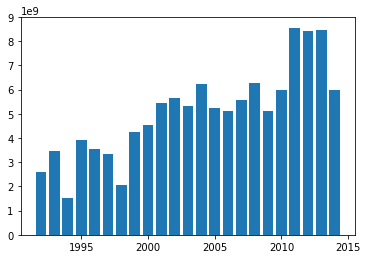

In [16]:
# get the years
years = stage['Year'].values
# get the values 
Arm_ex = stage['Value'].values

# create
plt.bar(years,Arm_ex)
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

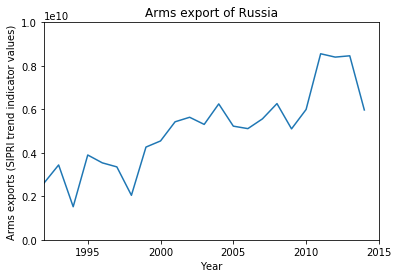

In [20]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Arms export of Russia')

# to make more honest, start they y axis at 0
plt.axis([1992, 2015,0,10e+9])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values of arms export per year. 

In [21]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values
print(hist_data)

[2.613e+09 3.442e+09 1.521e+09 3.900e+09 3.539e+09 3.353e+09 2.046e+09
 4.264e+09 4.546e+09 5.427e+09 5.635e+09 5.307e+09 6.250e+09 5.227e+09
 5.113e+09 5.561e+09 6.264e+09 5.102e+09 5.993e+09 8.556e+09 8.402e+09
 8.462e+09 5.971e+09]


In [22]:
print(len(hist_data))

23


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


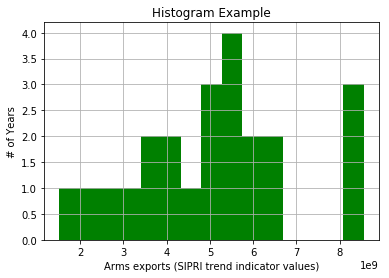

In [25]:
# the histogram of the data
plt.hist(hist_data, 15, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So Russia has many years where it has an arm export between 5*1e+9 to about 6.7*1e+9.While there are 3 years of values that outlie at the range of over 8*1e9

### But how do Russia's arms export relate to those of other countries? 

In [57]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'Arms export'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
Arm_ex_2011 = data[mask1 & mask2]
Arm_ex_2011.head(n=25)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5028428,East Asia & Pacific (developing only),EAP,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,1.344000e+09
5029212,Euro area,EMU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,6.241000e+09
5029780,Europe & Central Asia (all income levels),ECS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,1.797500e+10
5030427,Europe & Central Asia (developing only),ECA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,9.570000e+08
5031294,European Union,EUU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,7.998000e+09
5032943,High income,HIC,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,2.761400e+10
5034118,High income: OECD,OEC,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,1.895500e+10
5041297,North America,NAC,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,9.432000e+09
5041831,OECD members,OED,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,1.904100e+10
5043889,South Asia,SAS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,3.000000e+06


For how many countries and region do we have arms_export data in 2011

In [58]:
print(len(Arm_ex_2011))

54


In [63]:
data_2011=Arm_ex_2011.drop(Arm_ex_2011.index[0:4])

print(data_2011.head(n=10))

               CountryName CountryCode  \
5031294     European Union         EUU   
5032943        High income         HIC   
5034118  High income: OECD         OEC   
5041297      North America         NAC   
5041831       OECD members         OED   
5043889         South Asia         SAS   
5048374            Albania         ALB   
5051828          Argentina         ARG   
5053906          Australia         AUS   
5054615            Austria         AUT   

                                       IndicatorName   IndicatorCode  Year  \
5031294  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5032943  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5034118  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5041297  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5041831  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5043889  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD 

In [64]:
data_2011=data_2011.drop(data_2011.index[1:6])

print(data_2011.head())


            CountryName CountryCode  \
5031294  European Union         EUU   
5048374         Albania         ALB   
5051828       Argentina         ARG   
5053906       Australia         AUS   
5054615         Austria         AUT   

                                       IndicatorName   IndicatorCode  Year  \
5031294  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5048374  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5051828  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5053906  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5054615  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   

                Value  
5031294  7.998000e+09  
5048374  0.000000e+00  
5051828  1.000000e+06  
5053906  1.430000e+08  
5054615  4.600000e+07  


In [68]:
arm_ex_Rus=data_2011['CountryCode']=='RUS'
data_Rus=data_2011[arm_ex_Rus]
print(data_Rus)

                CountryName CountryCode  \
5163075  Russian Federation         RUS   

                                       IndicatorName   IndicatorCode  Year  \
5163075  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   

                Value  
5163075  8.556000e+09  


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


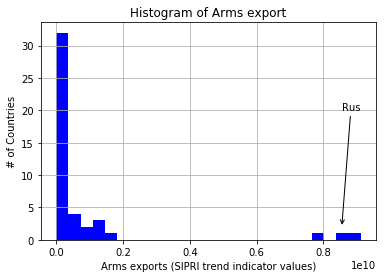

In [73]:
# let's plot a histogram of the arm_export by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Rus",
            xy=(0.855*1e+10,2), xycoords='data',
            xytext=(0.855*1e+10, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
           

plt.hist(data_2011['Value'], 25, normed=False, facecolor='blue')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Arms export')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

Interesting ! There are only few countries' arms export exceed 0.8*1e+10 and most of the countries fall a large lag behind those super powers, with the values that are less than 0.2*1e+10
Russia,is almost at the top list among all the 54 countries.


It is worth to explore the members in the top list!

In [78]:
top=data_2011['Value']>=0.6*1e+10
top_df=data_2011[top]
print(top_df)

                CountryName CountryCode  \
5031294      European Union         EUU   
5163075  Russian Federation         RUS   
5194700       United States         USA   

                                       IndicatorName   IndicatorCode  Year  \
5031294  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5163075  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   
5194700  Arms exports (SIPRI trend indicator values)  MS.MIL.XPRT.KD  2011   

                Value  
5031294  7.998000e+09  
5163075  8.556000e+09  
5194700  9.111000e+09  


USA,Russia and EUU are the top three.

### Relationship between GDP and Arms export in Rus

In [80]:
# select GDP Per capita OF Rus
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'RUS'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# 
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [84]:
gdp_stage.head(2)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1860203,Russian Federation,RUS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1989,5883.652144
1972096,Russian Federation,RUS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1990,5685.167419


In [82]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2208738,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1992,2.613000e+09
2331884,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1993,3.442000e+09


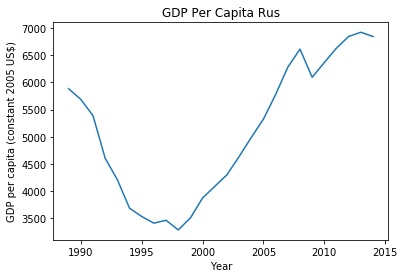

In [85]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita Rus')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

The GDP/cap decreased dramatically during the first decades of the after-Soviet period and keep an upeard trand from 2000 to 2014.
Compare with data of Arm export during the first period, we can see that the Arm export values fluctuate obviously while with little increase during the first period. 
The arm export then began to level up when Russia's GDP per cap rised after 2000 but again bumped into a decrease turning point in 2014, when the GDP per cap also sufferd from a descend.

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [86]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("Arm export Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1989 max:  2014
Arm export Min Year =  1992 max:  2014


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [87]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] >= 1992]
print(len(gdp_stage_trunc))
print(len(stage))

23
23


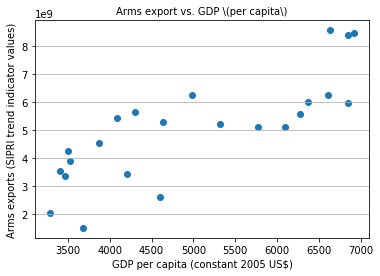

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Arms export vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

It seems that these two variables form a relationship to a certain extend because an obvious curve can be fit .  
We can test this by looking at correlation.

In [89]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.79836044],
       [0.79836044, 1.        ]])

A correlation of nearly 0.8 is somehow strong

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [29]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>